***Comentario:*** estas notas están basadas en el curso del profesor [Kyle T. Mandli](https://github.com/mandli/intro-numerical-methods) (en inglés)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Fuentes de error

Los cálculos numéricos, que involucran el uso de máquinas (análogas o digitales) presentan una serie de errores que provienen de diferentes fuentes:

- del Modelo
- de los datos
- de truncamiento
- de representación de los números (punto flotante)
- $\ldots$

***Meta:*** Categorizar y entender cada tipo de error y explorar algunas aproximaciones simples para analizarlas.

# Error en el modelo y los datos

Errores en la formulación fundamental

- Error en los datos: imprecisiones en las mediciones o incertezas en los parámetros

Infortunadamente no tenemos control de los errores en los datos y el modelo de forma directa pero podemos usar métodos que pueden ser más robustos en la presencia de estos tipos de errores.

# Error de truncamiento

Los errores surgen de la expansión de funciones con una función simple, por ejemplo, $sin(x) \approx x$ para $|x|\approx0$.

# Error de  representación de punto fotante

Los errores surgen de aproximar números reales con la representación  en precisión finita de números en el computador.

# Definiciones básicas

Dado un valor verdadero de una función $f$ y una solución aproximada $F$, se define:

- Error absoluto

$$e_a=|f-F|$$

- Error relativo

$$e_r = \frac{e_a}{|f|}=\frac{|f-F|}{|f|}$$



# Notación $\text{Big}-\mathcal{O}$

sea $$f(x)= \mathcal{O}(g(x)) \text{ cuando } x \rightarrow a$$

si y solo si

$$|f(x)|\leq M|g(x)| \text{ cuando } |x-a| < \delta \text{ donde } M, a > 0$$


En la práctica, usamos la notación $\text{Big}-\mathcal{O}$ para decir algo sobre cómo se pueden comportar los términos que podemos haber dejado fuera de una serie. Veamos el siguiente ejemplo de la aproximación de la serie de Taylor:

***Ejemplo:***

sea $f(x) = \sin x$ con $x_0 = 0$ entonces

$$T_N(x) = \sum^N_{n=0} (-1)^{n} \frac{x^{2n+1}}{(2n+1)!}$$

Podemos escribir $f(x)$ como

$$f(x) = x - \frac{x^3}{6} + \frac{x^5}{120} + \mathcal{O}(x^7)$$

Esto se vuelve más útil cuando lo vemos como lo hicimos antes con $\Delta x$:

$$f(x) = \Delta x - \frac{\Delta x^3}{6} + \frac{\Delta x^5}{120} + \mathcal{O}(\Delta x^7)$$

# Reglas para el error de propagación basado en la notación $\text{Big}-\mathcal{O}$

En general, existen dos teoremas que no necesitan prueba y se mantienen cuando el valor de $x$ es grande:

Sea

$$\begin{aligned}
    f(x) &= p(x) + \mathcal{O}(x^n) \\
    g(x) &= q(x) + \mathcal{O}(x^m) \\
    k &= \max(n, m)
\end{aligned}$$

Entonces

$$
    f+g = p + q + \mathcal{O}(x^k)
$$

y

\begin{align}
    f \cdot g &= p \cdot q + p \mathcal{O}(x^m) + q \mathcal{O}(x^n) + O(x^{n + m}) \\
    &= p \cdot q + \mathcal{O}(x^{n+m})
\end{align}

De otra forma, si estamos interesados en valores pequeños de $x$, $\Delta x$, la expresión puede ser modificada como sigue:

\begin{align}
    f(\Delta x) &= p(\Delta x) + \mathcal{O}(\Delta x^n) \\
    g(\Delta x) &= q(\Delta x) + \mathcal{O}(\Delta x^m) \\
    r &= \min(n, m)
\end{align}

entonces

$$
    f+g = p + q + O(\Delta x^r)
$$

y

\begin{align}
    f \cdot g &= p \cdot q + p \cdot \mathcal{O}(\Delta x^m) + q \cdot \mathcal{O}(\Delta x^n) + \mathcal{O}(\Delta x^{n+m}) \\
    &= p \cdot q + \mathcal{O}(\Delta x^r)
\end{align}

***Nota:*** En este caso, supongamos que al menos el polinomio con $𝑘 = max (𝑛, 𝑚)$ tiene la siguiente forma:

$$
    p(\Delta x) = 1 + p_1 \Delta x + p_2 \Delta x^2 + \ldots
$$

o

$$
    q(\Delta x) = 1 + q_1 \Delta x + q_2 \Delta x^2 + \ldots
$$

para que $\mathcal{O}(1)$ 


de modo que hay un término $\mathcal{O}(1)$ que garantiza la existencia de $\mathcal{O}(\Delta x^r)$ en el producto final.

Para tener una idea de por qué importa más la potencia en $\Delta x$ al considerar la convergencia, la siguiente figura muestra cómo las diferentes potencias en la tasa de convergencia pueden afectar la rapidez con la que converge nuestra solución. Tenga en cuenta que aquí estamos dibujando los mismos datos de dos maneras diferentes. Graficar el error como una función de $\Delta x$ es una forma común de mostrar que un método numérico está haciendo lo que esperamos y muestra el comportamiento de convergencia correcto. Dado que los errores pueden reducirse rápidamente, es muy común trazar este tipo de gráficos en una escala log-log para visualizar fácilmente los resultados. Tenga en cuenta que si un método fuera realmente del orden $n$, será una función lineal en el espacio log-log con pendiente $n$.

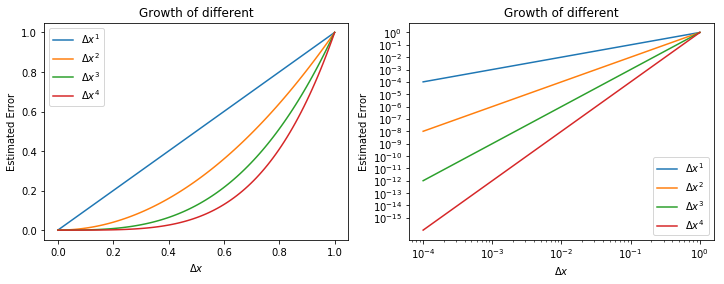

In [4]:
dx = np.linspace(1.0, 1e-4, 100)

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2.0)
axes = []
axes.append(fig.add_subplot(1, 2, 1))
axes.append(fig.add_subplot(1, 2, 2))

for n in range(1, 5):
    axes[0].plot(dx, dx**n, label="$\Delta x^%s$" % n)
    axes[1].loglog(dx, dx**n, label="$\Delta x^%s$" % n)

axes[0].legend(loc=2)
axes[1].set_xticks([10.0**(-n) for n in range(5)])
axes[1].set_yticks([10.0**(-n) for n in range(16)])
axes[1].legend(loc=4)
for n in range(2):
    axes[n].set_title("Growth of Error vs. $\Delta x^n$")
    axes[n].set_xlabel("$\Delta x$")
    axes[n].set_ylabel("Estimated Error")
    axes[n].set_title("Growth of different")
    axes[n].set_xlabel("$\Delta x$")
    axes[n].set_ylabel("Estimated Error")

plt.show()

# Error de truncamiento

***Teorema de Taylor:*** Sea $f(x) \in C^{m+1}[a,b]$ y $x_0 \in [a,b]$, para todo $x \in (a,b)$ existe un número $c = c(x)$ que se encuentra entre $x_0$ y $x$ tal que

$$ f(x) = T_N(x) + R_N(x)$$

donde $T_N(x)$ es la aproximación del polinomio de Taylor

$$T_N(x) = \sum^N_{n=0} \frac{f^{(n)}(x_0)\times(x-x_0)^n}{n!}$$

y $R_N(x)$ es el residuo (la parte de la serie que obviamos)

$$R_N(x) = \frac{f^{(n+1)}(c) \times (x - x_0)^{n+1}}{(n+1)!}$$

Otra forma de pensar acerca de estos resultados consiste en reemplazar $x - x_0$ con $\Delta x$. La idea principal es que el residuo $R_N(x)$ se vuelve mas pequeño cuando $\Delta x \rightarrow 0$.

$$T_N(x) = \sum^N_{n=0} \frac{f^{(n)}(x_0)\times \Delta x^n}{n!}$$

y $R_N(x)$ es el residuo (la parte de la serie que obviamos)

$$ R_N(x) = \frac{f^{(n+1)}(c) \times \Delta x^{n+1}}{(n+1)!} \leq M \Delta x^{n+1}$$

***Ejemplo 1:***

$f(x) = e^x$ con $x_0 = 0$

Usando esto podemos encontrar expresiones para el error relativo y absoluto en función de $x$ asumiendo $N=2$.

Derivadas:
$$\begin{aligned}
    f'(x) &= e^x \\
    f''(x) &= e^x \\ 
    f^{(n)}(x) &= e^x
\end{aligned}$$

Polinomio de Taylor:
$$\begin{aligned}
    T_N(x) &= \sum^N_{n=0} e^0 \frac{x^n}{n!} \Rightarrow \\
    T_2(x) &= 1 + x + \frac{x^2}{2}
\end{aligned}$$

Restos:
$$\begin{aligned}
    R_N(x) &= e^c \frac{x^{n+1}}{(n+1)!} = e^c \times \frac{x^3}{6} \quad \Rightarrow \\
    R_2(x) &\leq \frac{e^1}{6} \approx 0.5
\end{aligned}$$

Precisión:
$$
    e^1 = 2.718\ldots \\
    T_2(1) = 2.5 \Rightarrow e \approx 0.2 ~~ r \approx 0.1
$$

¡También podemos usar el paquete `sympy` que tiene la capacidad de calcular el polinomio de Taylor integrado!

In [5]:
import sympy
x = sympy.symbols('x')
f = sympy.symbols('f', cls=sympy.Function)

f = sympy.exp(x)
f.series(x0=0, n=6)

1 + x + x**2/2 + x**3/6 + x**4/24 + x**5/120 + O(x**6)

Graficando

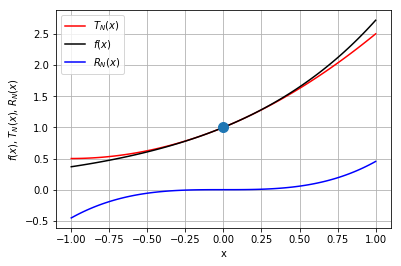

In [7]:
x = np.linspace(-1, 1, 100)
T_N = 1.0 + x + x**2 / 2.0
R_N = np.exp(1) * x**3 / 6.0

plt.plot(x, T_N, 'r', x, np.exp(x), 'k', x, R_N, 'b')
plt.plot(0.0, 1.0, 'o', markersize=10)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("$f(x)$, $T_N(x)$, $R_N(x)$")
plt.legend(["$T_N(x)$", "$f(x)$", "$R_N(x)$"], loc=2)
plt.show()

***Ejemplo 2:***

Aproximar

$$ f(x) = \frac{1}{x} \quad x_0  = 1,$$

usando $x_0 = 1$ para el tercer termino de la serie de Taylor.

$$\begin{aligned}
    f'(x) &= -\frac{1}{x^2} \\
    f''(x) &= \frac{2}{x^3} \\
    f^{(n)}(x) &= \frac{(-1)^n n!}{x^{n+1}}
\end{aligned}$$

$$\begin{aligned}
    T_N(x) &= \sum^N_{n=0} (-1)^n (x-1)^n \Rightarrow \\
    T_2(x) &= 1 - (x - 1) + (x - 1)^2
\end{aligned}$$

$$\begin{aligned}
    R_N(x) &= \frac{(-1)^{n+1}(x - 1)^{n+1}}{c^{n+2}} \Rightarrow \\
    R_2(x) &= \frac{-(x - 1)^{3}}{c^{4}}
\end{aligned}$$

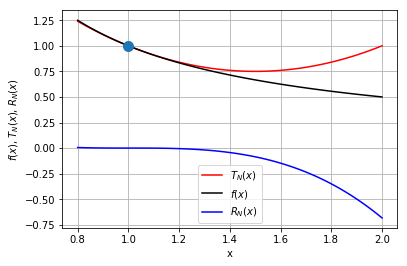

In [8]:
x = np.linspace(0.8, 2, 100)
T_N = 1.0 - (x-1) + (x-1)**2
R_N = -(x-1.0)**3 / (1.1**4)

plt.plot(x, T_N, 'r', x, 1.0 / x, 'k', x, R_N, 'b')
plt.plot(1.0, 1.0, 'o', markersize=10)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("$f(x)$, $T_N(x)$, $R_N(x)$")

plt.legend(["$T_N(x)$", "$f(x)$", "$R_N(x)$"], loc=8)
plt.show()

# Error de punto flotante

Errores surgen de aproximar números reales con números de precisión finita

$$\pi \approx 3.14$$

o $\frac{1}{3} \approx 0.333333333$ en decimal, los resultados forman un número finito de registros para representar cada número.

# Sistemas de punto flotante

Los números en sistemas de punto flotante se representan como una serie de bits que representan diferentes partes de un número. En los sistemas de punto flotante normalizados, existen algunas convenciones estándar para el uso de estos bits. En general, los números se almacenan dividiéndolos en la forma

$$F = \pm d_1 . d_2 d_3 d_4 \ldots d_p \times \beta^E$$

donde

1. $\pm$ es un bit único y representa el signo del número.


2. $d_1 . d_2 d_3 d_4 \ldots d_p$ es la *mantisa*. observe que, técnicamente, el decimal se puede mover, pero en general, utilizando la notación científica, el decimal siempre se puede colocar en esta ubicación. Los digitos $d_2 d_3 d_4 \ldots d_p$ son llamados la *fracción* con $p$ digitos de precisión. Los sistemas normalizados específicamente ponen el punto decimal en el frente y asume $d_1 \neq 0$ a menos que el número sea exactamente $0$.


3. $\beta$ es la *base*. Para el sistema binario $\beta = 2$, para decimal $\beta = 10$, etc.


4. $E$ es el *exponente*, un entero en el rango $[E_{\min}, E_{\max}]$

Los puntos importantes en cualquier sistema de punto flotante es

1. Existe un conjunto discreto y finito de números representables.


2. Estos números representables no están distribuidos uniformemente en la línea real


3. La aritmética en sistemas de punto flotante produce resultados diferentes de la aritmética de precisión infinita (es decir, matemática "real")

# Propiedades de los sistemas de punto flotante

Todos los sistemas de punto flotante se caracterizan por varios números importantes

- Número normalizado reducido (underflow si está por debajo, relacionado con números sub-normales alrededor de cero)


- Número normalizado más grande (overflow)


- Cero


- $\epsilon$ o $\epsilon_{mach}$


- `Inf` y `nan`

***Ejemplo: Sistema de juguete***

Considere el sistema decimal de 2 digitos de  precisión (normalizado)

$$f = \pm d_1 . d_2 \times 10^E$$

con $E \in [-2, 0]$.

**Numero y distribución de números**


1. Cuántos números pueden representarse con este sistema?


2. Cuál es la distribución en la línea real?


3. Cuáles son los límites underflow y overflow?

Cuántos números pueden representarse con este sistema?

$$f = \pm d_1 . d_2 \times 10^E ~~~ \text{with} E \in [-2, 0]$$

$$2 \times 9 \times 10 \times 3 + 1 = 541$$

Cuál es la distribución en la línea real?

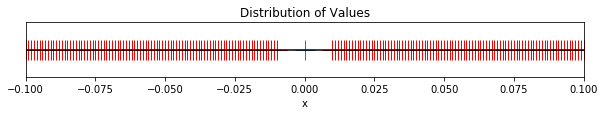

In [9]:
d_1_values = [1, 2, 3, 4, 5, 6, 7, 8, 9]
d_2_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
E_values = [0, -1, -2]

fig = plt.figure(figsize=(10.0, 1.0))
axes = fig.add_subplot(1, 1, 1)

for E in E_values:
    for d1 in d_1_values:
        for d2 in d_2_values:
            axes.plot( (d1 + d2 * 0.1) * 10**E, 0.0, 'r+', markersize=20)
            axes.plot(-(d1 + d2 * 0.1) * 10**E, 0.0, 'r+', markersize=20)
            
axes.plot(0.0, 0.0, '+', markersize=20)
axes.plot([-10.0, 10.0], [0.0, 0.0], 'k')

axes.set_title("Distribution of Values")
axes.set_yticks([])
axes.set_xlabel("x")
axes.set_ylabel("")
axes.set_xlim([-0.1, 0.1])
plt.show()

Cuáles son los límites superior (overflow) e inferior (underflow)?

- El menor número que puede ser representado (underflow) es: $1.0 \times 10^{-2} = 0.01$



- El mayor número que puede ser representado (overflow) es:  $9.9 \times 10^0 = 9.9$

## Sistema Binario

Considere el sistema en base 2 de 2 dígitos de precisión

$$f=\pm d_1 . d_2 \times 2^E \quad \text{with} \quad E \in [-1, 1]$$


**Numero y distribución de números**


1. Cuántos números pueden representarse con este sistema?


2. Cuál es la distribución en la línea real?


3. Cuáles son los límites underflow y overflow?

Cuántos números pueden representarse en este sistema?


$$f=\pm d_1 . d_2 \times 2^E ~~~~ \text{con} ~~~~ E \in [-1, 1]$$

$$ 2 \times 1 \times 2 \times 3 + 1 = 13$$

Cuál es la distribución en la línea real?

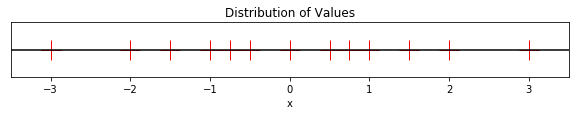

In [10]:
d_1_values = [1]
d_2_values = [0, 1]
E_values = [1, 0, -1]

fig = plt.figure(figsize=(10.0, 1.0))
axes = fig.add_subplot(1, 1, 1)

for E in E_values:
    for d1 in d_1_values:
        for d2 in d_2_values:
            axes.plot( (d1 + d2 * 0.5) * 2**E, 0.0, 'r+', markersize=20)
            axes.plot(-(d1 + d2 * 0.5) * 2**E, 0.0, 'r+', markersize=20)
            
axes.plot(0.0, 0.0, 'r+', markersize=20)
axes.plot([-4.5, 4.5], [0.0, 0.0], 'k')

axes.set_title("Distribution of Values")
axes.set_yticks([])
axes.set_xlabel("x")
axes.set_ylabel("")
axes.set_xlim([-3.5, 3.5])
plt.show()

Cuáles son los límites superior (overflow) e inferior (underflow)?

- El menor número que puede ser representado (underflow) es: $1.0 \times 2^{-1} = 0.5$




- El mayor número que puede ser representado (overflow) es:  $1.1 \times 2^1 = 3$

Observe que estos números son en sistema binario. 

Una rápida regla de oro:

$$2^3 2^2 2^1 2^0 . 2^{-1} 2^{-2} 2^{-3}$$

corresponde a

8s, 4s, 2s, 1s . mitades, cuartos, octavos, $\ldots$

# Sistema real - IEEE 754 sistema binario de punto flotante

## Precisión simple

- Almacenamiento total es de 32 bits


- Exponente de 8 bits $\Rightarrow E \in [-126, 127]$


- Fracción 23 bits ($p = 24$)


```
s EEEEEEEE FFFFFFFFFFFFFFFFFFFFFFF
0 1      8 9                     31
```

Overflow $= 2^{127} \approx 3.4 \times 10^{38}$

Underflow $= 2^{-126} \approx 1.2 \times 10^{-38}$

$\epsilon_{\text{machine}} = 2^{-23} \approx 1.2 \times 10^{-7}$
